## Group Project

In [9]:
library(tidyverse)
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Use tidymodels_prefer() to resolve common conflicts.



In [10]:
players <- read_csv("players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [11]:
sessions <- read_csv("sessions.csv")
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


### Data wrangling 

In [12]:
player_data <- players |>
  rowwise() |>
  mutate(
      active = {
      this_email <- hashedEmail
      count_sessions <- nrow(filter(sessions, hashedEmail == this_email))
      if (count_sessions > 0) "Active" else "Inactive"}) |>
  ungroup() |>
  mutate(active = factor(active), gender = factor(gender), experience = factor(experience))

head(player_data)

experience,subscribe,hashedEmail,played_hours,name,gender,Age,active
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>,<fct>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,Active
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,Active
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,Active
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,Active
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,Active
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,Inactive


In [26]:
player_data_2 <- player_data |>
    select(-subscribe, -name, -played_hours,-hashedEmail)
head(player_data_2)
dim(player_data_2)

experience,gender,Age,active
<fct>,<fct>,<dbl>,<fct>
Pro,Male,9,Active
Veteran,Male,17,Active
Veteran,Male,17,Active
Amateur,Female,21,Active
Regular,Male,21,Active
Amateur,Female,17,Inactive


[1] 196   4

In [41]:
summary <- player_data_2 |>
    summarize(age_mean=mean(Age,na.rm=TRUE), age_min=min(Age,na.rm=TRUE), age_max=max(Age,na.rm=TRUE))
summary

age_mean,age_min,age_max
<dbl>,<dbl>,<dbl>
21.13918,9,58


### Visualization (Figures)

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


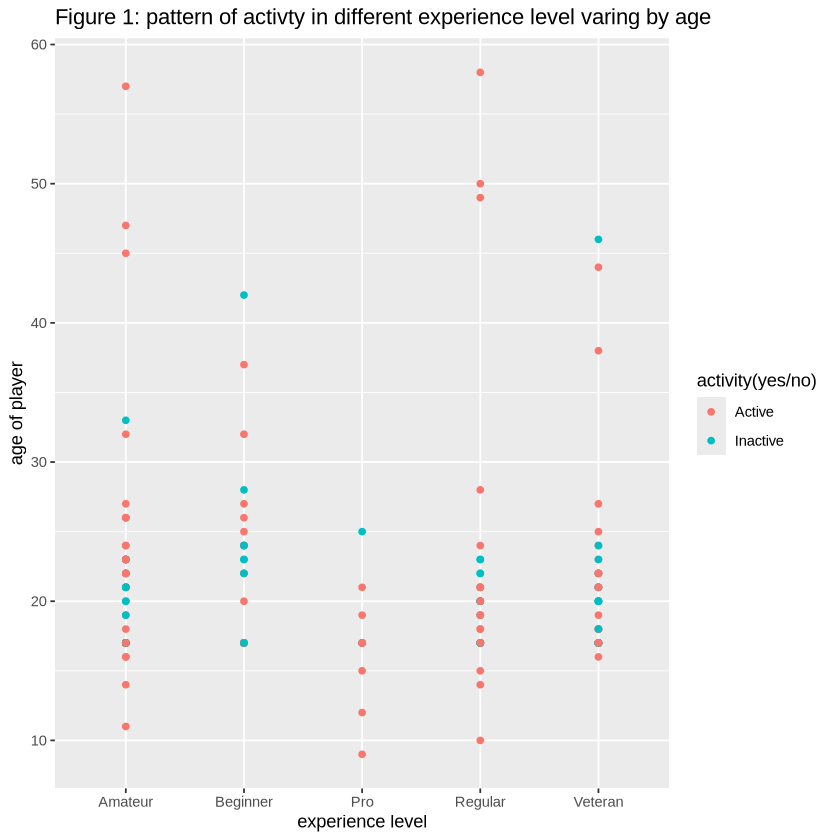

In [27]:
plot_1 <- player_data_2 |>
    ggplot(aes(x=experience, y=Age, color=active))+
    geom_point()+
    labs(x="experience level", y="age of player", color="activity(yes/no)")+
    ggtitle("Figure 1: pattern of activty in different experience level varing by age")
plot_1

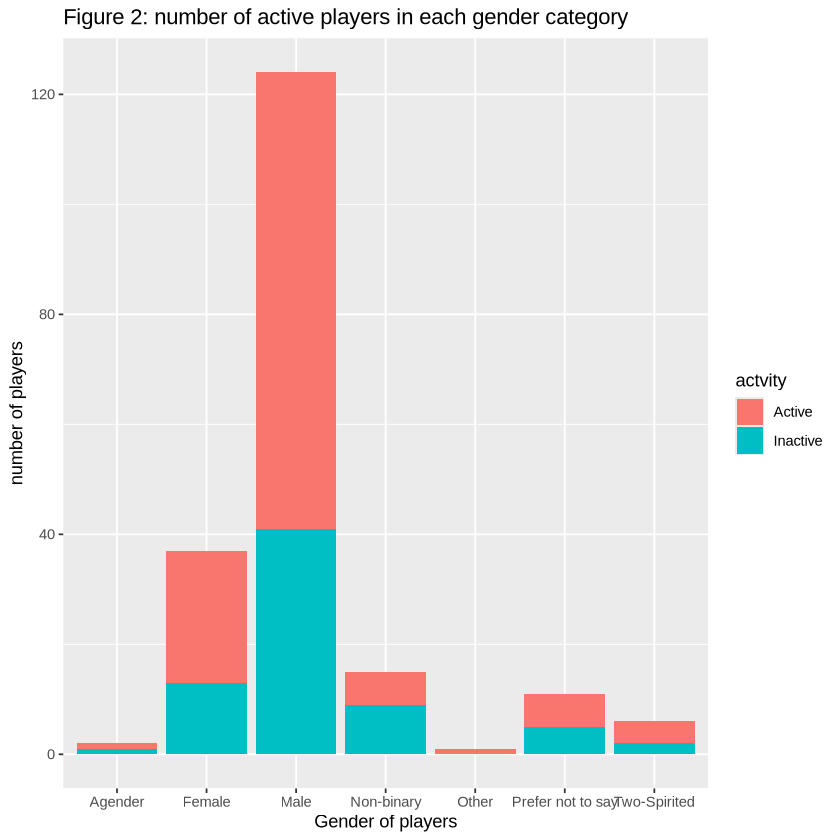

In [28]:
plot_2<- player_data_2 |>
    ggplot(aes(x=gender, fill=active))+
    geom_bar() + 
    labs(x="Gender of players", y="number of players", fill="actvity") +
    ggtitle("Figure 2: number of active players in each gender category")
plot_2

### Analysing using Classification

In [31]:
data_split <- initial_split(player_data_2, prop = 0.75, strata=active)
training_data <- training(data_split)
testing_data <- testing(data_split)
training_data

experience,gender,Age,active
<fct>,<fct>,<dbl>,<fct>
Pro,Male,9,Active
Veteran,Male,17,Active
Veteran,Male,17,Active
Regular,Male,21,Active
Amateur,Male,21,Active
Veteran,Female,23,Active
Beginner,Female,25,Active
Amateur,Male,22,Active
Amateur,Male,17,Active


In [33]:
recipe <- recipe(active ~experience+gender+Age, data=training_data)
knn_tune <- nearest_neighbor(weight_func="rectangular", neighbors=tune())|>
    set_engine("kknn")|>
    set_mode("classification")
vfold <- vfold_cv(training_data, v=5, strata=active) 
k_vals <- tibble(neighbors=seq(from=1, to=50, by=2))
knn_metric <- workflow()|>
    add_recipe(recipe)|>
    add_model(knn_tune)|>
    tune_grid(resample=vfold, grid=k_vals)|>
    collect_metrics()
accuracy <- knn_metric |>
    filter(.metric == "accuracy")
accuracy


→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 29 rows.
               ✖ Assigned data has 30 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 30 to size 29.

There were issues with some computations   A: x1

There were issues with some computations   A: x2

There were issues with some computations   A: x2





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5103175,3,0.030001680,Preprocessor1_Model01
3,accuracy,binary,0.6500000,3,0.027042421,Preprocessor1_Model02
5,accuracy,binary,0.6039683,3,0.017940722,Preprocessor1_Model03
7,accuracy,binary,0.5698413,3,0.041269841,Preprocessor1_Model04
9,accuracy,binary,0.5587302,3,0.024216105,Preprocessor1_Model05
11,accuracy,binary,0.5817460,3,0.031835192,Preprocessor1_Model06
13,accuracy,binary,0.5928571,3,0.031134992,Preprocessor1_Model07
15,accuracy,binary,0.6047619,3,0.020756662,Preprocessor1_Model08
17,accuracy,binary,0.5928571,3,0.031134992,Preprocessor1_Model09


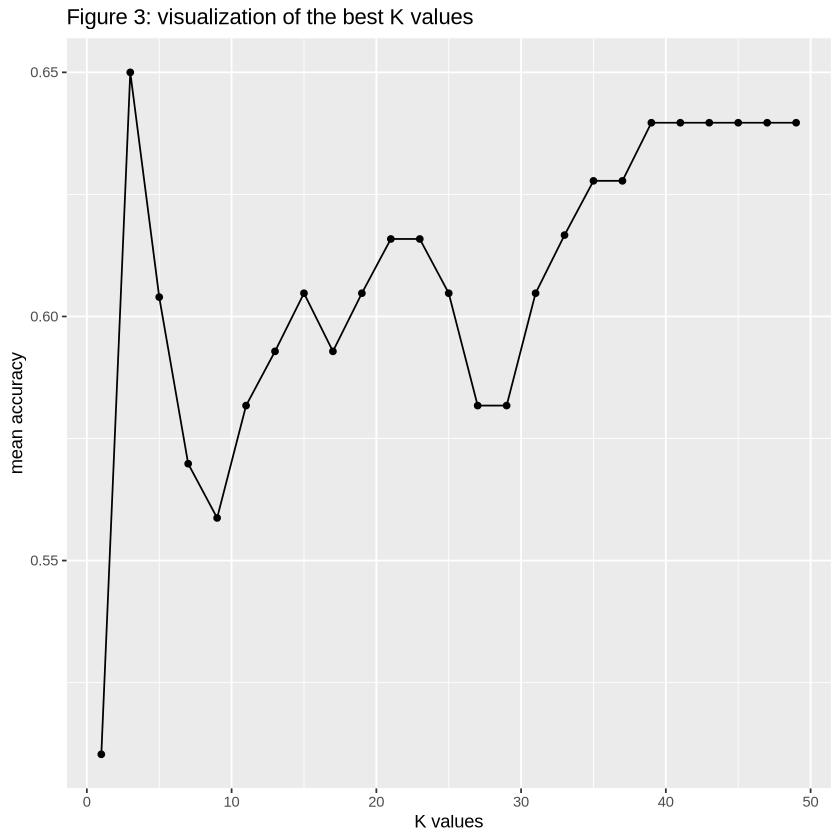

In [34]:
accuracy_plot <- accuracy |>
    ggplot(aes(x=neighbors, y=mean))+
    geom_point()+
    geom_line()+
    xlab("K values")+
    ylab("mean accuracy")+
    ggtitle("Figure 3: visualization of the best K values")
accuracy_plot

In [38]:
knn_spec <- nearest_neighbor(weight_func="rectangular", neighbors=3)|>
    set_engine("kknn")|>
    set_mode("classification")
knn_fit <- workflow()|>
    add_recipe(recipe)|>
    add_model(knn_spec)|>
    fit(data=training_data)
prediction <- predict(knn_fit, testing_data)|>
    bind_cols(testing_data)
prediction

.pred_class,experience,gender,Age,active
<fct>,<fct>,<fct>,<dbl>,<fct>
Active,Amateur,Female,21,Active
Active,Amateur,Male,47,Active
Active,Beginner,Female,17,Inactive
Inactive,Amateur,Female,17,Active
Active,Amateur,Female,21,Active
Inactive,Beginner,Male,26,Active
Active,Amateur,Male,17,Active
Active,Amateur,Male,17,Inactive
Active,Amateur,Male,24,Active


In [39]:
confusion <- prediction |> 
conf_mat(truth =active, estimate = .pred_class)
confusion

          Truth
Prediction Active Inactive
  Active       18       13
  Inactive     14        5